In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Aim is to predict the marks of students of the test data

  internet sex  traveltime  studytime  freetime  absences  age   iq  marks
0       no   M           2          2         5         6   18  118  73.13
1      yes   M           2          2         2         7   19  107  67.78
2      yes   M           3          3         3         5   18  108  70.84
3       no   F           3          3         4         9   17  100  66.68
4      yes   M           1          4         3         4   19   96  71.88


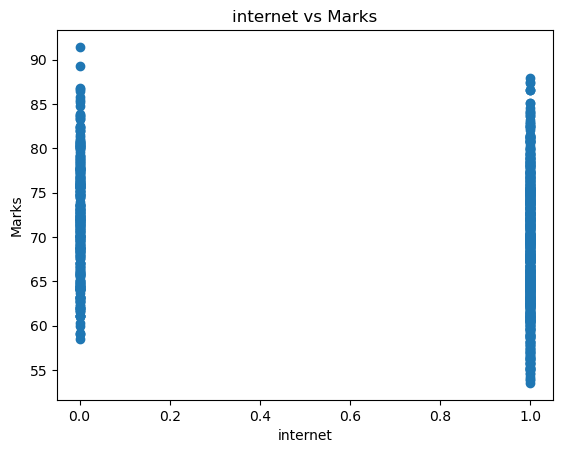

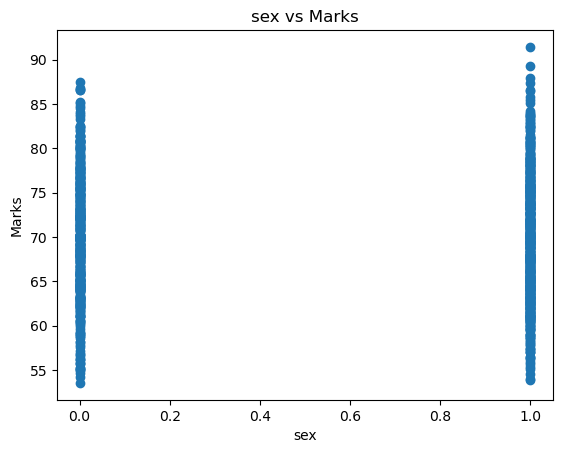

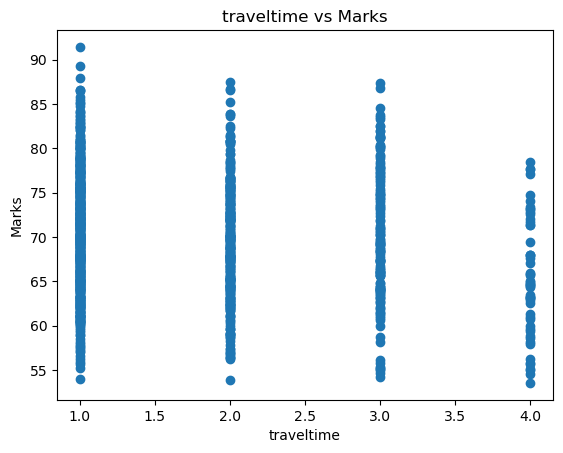

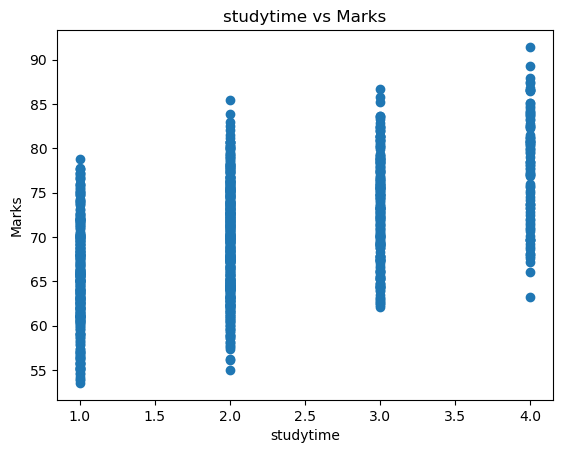

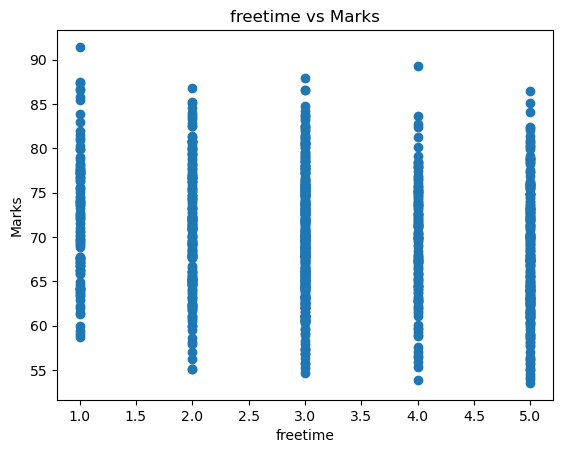

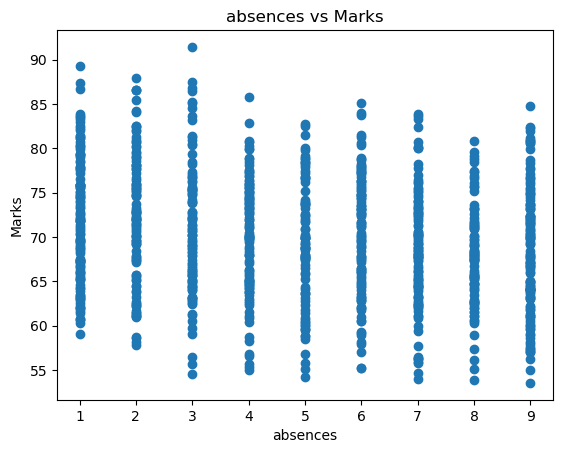

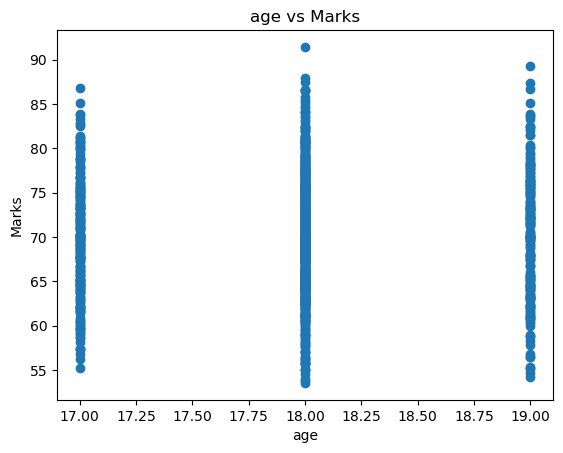

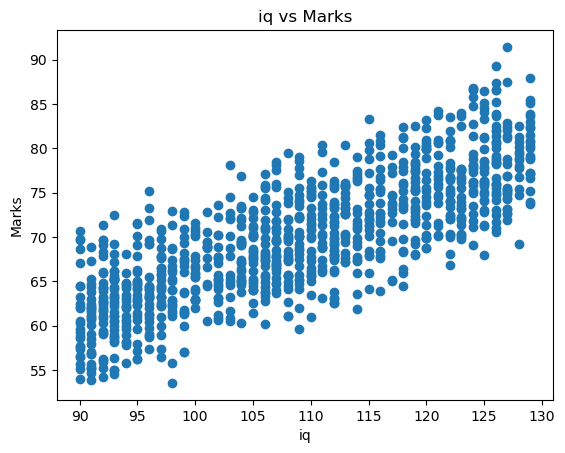

In [156]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')

# Getting an overview of the data
print(data.head())

# Function to label encode categorical features
def label_encode_features(data):
    le = LabelEncoder()
    for column in data.columns:
        if data[column].dtype == 'object':  # Check if the column is categorical
            data[column] = le.fit_transform(data[column])
    return data

# LabeL encoding the features
data = label_encode_features(data)

# Extracting features and target variable
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)


# Visualizing the relationship between y_train and each feature:
for i in range(x_train.shape[1]):
    plt.scatter(x_train[:, i], y_train)
    plt.xlabel(data.columns[i])
    plt.ylabel('Marks')
    plt.title(f'{data.columns[i]} vs Marks')
    plt.show()

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    # Interaction between 'age' and 'studytime'
    age_studytime_interaction = x_train[:, 5] * x_train[:, 2]
    # Polynomial feature of 'iq'
    iq_squared = x_train[:, 6] ** 2
    
    # Adding new features to x_train
    x_train = np.hstack((x_train, age_studytime_interaction.reshape(-1, 1)))
    x_train = np.hstack((x_train, iq_squared.reshape(-1, 1)))
    
    return x_train

x_train = feature_changing(x_train)

In [157]:
def z_score(x_train):

  # Calculating the mean and standard deviation for each feature
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    
    # Applying Z-score normalization
    x_train = (x_train - x_mean) / x_std
    

    return x_train,x_std,x_mean

In [158]:
def cost(x_train,y_train,w,b):

   # Number of training examples
    m = x_train.shape[0]
    
    # Calculating the predictions
    predictions = np.dot(x_train, w) + b
    
    # Calculating the errors
    errors = predictions - y_train
    
    # Calculating the mean squared error
    loss = (1 / (2 * m)) * np.sum(errors ** 2)
    

    return loss

In [162]:
def gradient_descent(x_train,y_train,w,b,learning_rate=0.01,num_iterations=1000):
    m = x_train.shape[0]
    
    for i in range(num_iterations):
        # Calculating the predictions
        predictions = np.dot(x_train, w) + b
        
        # Computing the gradients
        dw = (1 / m) * np.dot(x_train.T, (predictions - y_train))
        db = (1 / m) * np.sum(predictions - y_train)
        
        # Updating the weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # printing the cost every 100 iterations for monitoring
        if i % 100 == 0:
            cost_value = cost(x_train, y_train, w, b)
            print(f"Iteration {i}: Cost = {cost_value}")

    return w,b

In [164]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
    old_cost = cost(x_train,y_train,w,b)
    w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)

# Handle categorical data in x_predict (if necessary)
# Assuming the first column 'internet' is categorical
label_encoder = LabelEncoder()
x_predict[:, 0] = label_encoder.fit_transform(x_predict[:, 0])
x_predict[:, 1] = label_encoder.fit_transform(x_predict[:, 1])

# Convert x_predict to float64 explicitly
x_predict = x_predict.astype(np.float64)

x_predict = (x_predict - x_mean)/x_std

ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b


accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
        
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")


# # Debugging the output
# print("Predictions vs. Actuals:")
# for i in range(len(ans)):
#     print(f"Prediction: {y_predict[i]}, Actual: {ans[i]}")

# print(f"Final cost after optimization: {cost(x_train, y_train, w, b)}")

Iteration 0: Cost = 2424.438670402651
Iteration 100: Cost = 324.481055282081
Iteration 200: Cost = 43.5341058977653
Iteration 300: Cost = 5.904228191730153
Iteration 400: Cost = 0.8552816653997372
Iteration 500: Cost = 0.17101791755007503
Iteration 600: Cost = 0.07237412491755033
Iteration 700: Cost = 0.05304753049232518
Iteration 800: Cost = 0.045107595131923986
Iteration 900: Cost = 0.03935907170705643
Iteration 0: Cost = 0.0344871046027136
Iteration 100: Cost = 0.030242971094044255
Iteration 200: Cost = 0.02652983166476563
Iteration 300: Cost = 0.02327910348686978
Iteration 400: Cost = 0.020432909991088665
Iteration 500: Cost = 0.01794086767207764
Iteration 600: Cost = 0.01575890155322533
Iteration 700: Cost = 0.013848426379789199
Iteration 800: Cost = 0.012175658970548977
Iteration 900: Cost = 0.010711020061974276
Iteration 0: Cost = 0.009428611110512342
Iteration 100: Cost = 0.00830575626979994
Iteration 200: Cost = 0.007322601371596321
Iteration 300: Cost = 0.006461762808954443
I